# Arbeidskrav (5)

## Forberedelser

In [1]:
# Loading packages.
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

In [2]:
# Creating a template for the figure in task 3.
def create_figure():
                fig, ax = plt.subplots()
                ax.set_ylabel("Test rekkevidde (stopp)", loc = "top")
                ax.set_xlabel("Leverandør rekkevidde (km)", loc = "right")
                ax.set_title("El-bil rekkevidde", loc = "left")
                ax.annotate("Kilde: Motor", (700,5), fontsize=10)
                ax.set(xlim=(0,700))
                ax.set(ylim=(0,600))
                ax.spines["top"].set_color("none")
                ax.spines["right"].set_color("none")
                
                return fig, ax

## Oppgave 1

In [3]:
# Definining the url where the data (table) is located.
url = "https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132"

# Sendig a HTTP GET request to the url and storing the response.
url_response = requests.get(url)

# Creating a BeautfulSoup object from the HTML content (response). 
url_html = BeautifulSoup(url_response.content, "html.parser")

In [4]:
# Using the find_all() method to search for alle "table" tags withing the HTML data.
tables = url_html.find_all("table")

# Selecting the table that includes the data i'm interested in.
car_table = tables[0]

# Converting the data to a dataframe.
car_df = pd.read_html(str(car_table))[0]

In [5]:
# Renaming the modell column.
car_df.rename(columns = {car_df.columns[0]: "Modell"}, inplace = True)

In [6]:
# Showing the dataframe (task 1 done).
car_df

,Modell,WLTP-tall,STOPP,Avvik
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
5,Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"
6,NIO ES8 LR 7-seter,"488 km/21,5 kWh",425 km,"-12,91 %"
7,Kia EV6 4WD,"484 km/18,0 kWh",423 km,"-12,60 %"
8,Volkswagen ID.4 Pro,"485 km/18,4 kWh",414 km,"-14,64 %"
9,Hyundai Ioniq 5 2WD,"481 km/16,8 kWh",408 km,"-15,18 %"


## Oppgave 2

In [7]:
# Splitting the "WLTP-tall" column by "/" and creating a new column with the splitted data.
car_df[["WLTP/km", "kWh"]] = car_df["WLTP-tall"].str.split("/", expand = True)

# Splitting the "WLTP/km" column by the space between the int's and strings. 
car_df[["WLTP/km", "drop/km"]] = car_df["WLTP/km"].str.split(" ", expand = True)

# Splitting the "STOPP" column by the space between the int's and strings.
car_df[["STOPP", "drop/stopp"]] = car_df["STOPP"].str.split(" ", expand = True)

In [8]:
# Removing (drop) the columns i dont need to create the figure later in this assignment.
car_df = car_df.drop(columns = ["WLTP-tall", "Avvik", "kWh", "drop/km", "drop/stopp"])

In [9]:
# Replacing all values of "x" with a na.
car_df.replace("x", np.nan, inplace = True)

# Removing (drop) all na values.
car_df.dropna(inplace = True)

In [10]:
# Making the "Modell" column the index in the dataframe to make it easier to convert the values to flaot's.  
car_df.set_index("Modell", inplace = True)

# Coverting the remaining values in the dataframe to float's.
car_df = car_df.astype(float)

In [11]:
# Showing the cleaned up dataframe (task 2 done).
car_df

,STOPP,WLTP/km
Modell,,
Tesla Model 3 LR Dual motor,521.0,614.0
Mercedes-Benz EQS 580 4matic,513.0,645.0
BMW iX xDrive50,503.0,591.0
Tesla Model Y LR Dual motor,451.0,507.0
Volkswagen ID.3 PRO S,435.0,539.0
Kia EV6 2WD,429.0,528.0
NIO ES8 LR 7-seter,425.0,488.0
Kia EV6 4WD,423.0,484.0
Volkswagen ID.4 Pro,414.0,485.0


## Oppgave 3

In [12]:
# Creating a intervall between 0, 1000, with a 1000 points.
x = np.linspace(0, 1000, 1000)

In [13]:
# Creating lists of values for easier input in the figure.
stopp = car_df["STOPP"]
km = car_df["WLTP/km"]

In [14]:
# Creating values for a regression model.
a, b = np.polyfit(km, stopp, 1) 

# Creating regression modell.
regression = a*x+b

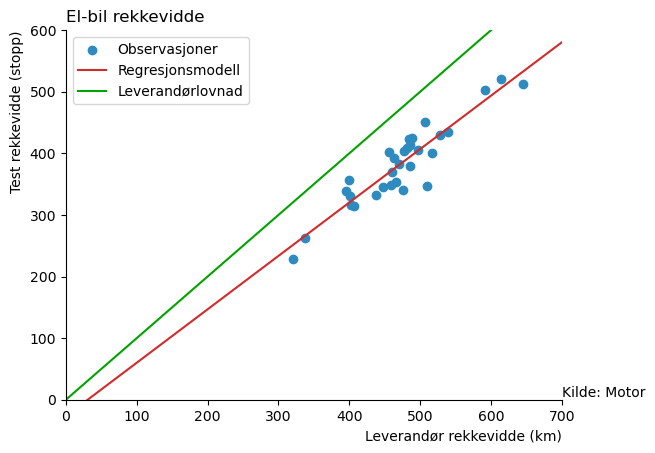

In [15]:
# Using the template from "Forberedelser".
fig, ax = create_figure()

# Plotting observations, regression model and supplier range.
ax.scatter(km, stopp, label = "Observasjoner", color = "#2E8BC0")
ax.plot(x, regression, label = "Regresjonsmodell", color = "#D22B2B")
ax.plot(x, x, label = "Leverandørlovnad", color = "#00A300")

# Adding a legend (task 3 done).
ax.legend(loc='upper left',frameon=True);

## Kilder

Raaum, P. Monn-Iversen, Ø. A. (04.02.2022) *Så mye rekkevidde gikk tapt i vinterkulda.* Motor. https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132